<a href="https://colab.research.google.com/github/ashcat2005/lightcurve-exoplanet/blob/main/ExoplanetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exoplanet Model

---
## Flux Model
Simple model of the flux (without limb darkening). Eq. (1) in reference [1] or Eq. (2.1) in [2].

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def L(p, z):
  '''
  Obstruction function
  '''
  if z>1+p:
    return 0.
  elif (1-p<z and z<=1+p):
    k0 = np.arccos((p**2 + z**2 -1)/(2*p*z))
    k1 = np.arccos((1-p**2 + z**2)/(2*z))
    L0 = k0*p**2
    L2 = np.sqrt((4*z**2- (1+z**2-p**2)**2)/4) 
    return (L0 + k1 - L2)/np.pi
  elif (z>=0. and z<=1-p):
    return p**2
  elif z<= p-1: # Check this option!!
    return 1.

p = 0.1 # Ratio of sizes r_p/r_*

n=100 # Number of points in the grid
z = np.linspace(0.,1.5,n) #Values of the adimensional distance z
F = np.zeros(n) # Flux

# Determine the flux at each value of z
for i in range(n):
  F[i] = 1. - L(p,z[i])


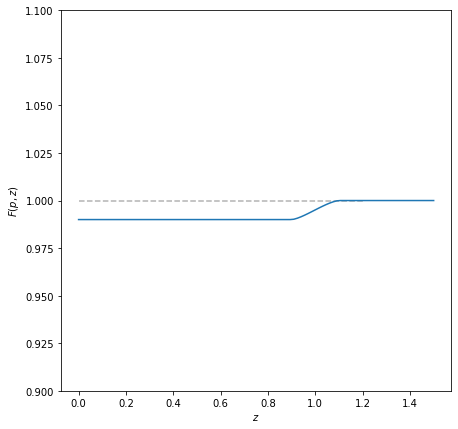

In [4]:
# Plot the Flux as function of z
plt.figure(figsize=(7,7))
plt.plot(z, F)
plt.hlines(1., 0., 1.2,linestyle='dashed', alpha=0.3)
plt.ylim(0.9,1.1)
plt.xlabel(r'$z$')
plt.ylabel(r'$F(p,z)$')
plt.show()

---
## Limb-Darkening
Simple model for the limb-darkening. Eq. (2.2) of [2].

In [5]:

def I(r):
  '''
  Limb-darkening function
  '''
  gamma1 = 0.5 
  gamma2 = 0.1
  mu = np.sqrt(1-r**2) 
  return 1. - gamma1*(1-mu) - gamma2*(1-mu)**2

# Saptial grid
n = 100
r = np.linspace(0., 1., n)

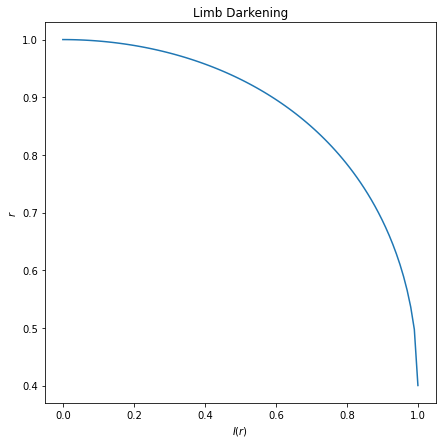

In [6]:
#Plot the limb-darkening function
plt.figure(figsize=(7,7))
plt.plot(r, I(r))
plt.title(r'Limb Darkening')
plt.xlabel(r'$I(r)$')
plt.ylabel(r'$r$')
plt.show()

---
## Quadratic Limb Darkening

In [46]:
import numpy as np
from sympy import elliptic_k, elliptic_e, elliptic_pi, I, pi, N
# We import for sympy the following functions
# Complete elliptic integral of the first kind:  elliptic_k
# Elliptic integral of the second kind: elliptic_e
# Elliptic integral of the third kind:  elliptic_pi

gamma1 = 0.5 
gamma2 = 0.1
c2 = gamma1 + 2*gamma2
c4 = - gamma2
Omega = c2/(2+4) + c4/(4+4)

def a_function(p,z):
  return (z-p)**2

def b_function(p,z):
  return (z+p)**2

def q_function(p,z):
  return p**2 - z**2

def k_function(p,z):
  return np.sqrt((1-a_function(p,z))/(4*z*p))

def kappa_0_function(p,z):
  return np.arccos((p**2 + z**2 -1)/(2*p*z))

def kappa_1_function(p,z):
  return np.arccos((1-p**2 + z**2)/(2*z))

def lambda_e(p, z):
  '''
  Obstruction function lambda_e
  '''
  if z>1+p:
    return 0.
  elif (1-p<z and z<=1+p):
    kappa0 = kappa_0_function(p,z)
    kappa1 = kappa_1_function(p,z)
    L0 = kappa0*p**2
    L2 = np.sqrt((4*z**2- (1+z**2-p**2)**2)/4) 
    return (L0 + kappa1 - L2)/np.pi
  elif (z>=0. and z<=1-p):
    return p**2
  elif z<= p-1: # Check this option!!
    return 1.

def lambda_1(p, z):
  '''
  Obstruction function lambda_1
  '''
  a = a_function(p,z)
  b = b_function(p,z)
  k = k_function(p,z)
  q = q_function(p,z)
  C = 1/(9*pi*np.sqrt(p*z))
  T1 = ((1 - b)*(2*b + a - 3) - 3*q*(b-2))*elliptic_k(k)
  T2 = 4*p*z*(z**2 + 7*p**2 - 4)*elliptic_e(k)
  T3 = 3*(q/a)*elliptic_pi((a-1)/a,k)
  return C*(T1 + T2 - T3)

def lambda_2(p, z):
  '''
  Obstruction function lambda_2
  '''
  a = a_function(p,z)
  b = b_function(p,z)
  k = k_function(p,z)
  q = q_function(p,z)
  C = 2/(9*pi*np.sqrt(1-a))
  T1 = (1 - 5*z**2 + p**2 + q**2)*elliptic_k(1/k)
  T2 = (1-a)*(z**2 + 7*p**2 - 4)*elliptic_e(1/k)
  T3 = 3*(q/a)*elliptic_pi((a-b)/a,1/k)
  return C*(T1 + T2 - T3)

def lambda_3(p, z):
  '''
  Obstruction function lambda_3
  '''
  a = a_function(p,z)
  b = b_function(p,z)
  k = k_function(p,z)
  q = q_function(p,z)
  T1 = 1/3. 
  T2 = (16*p/(9*pi))*(2*p**2 -1)*elliptic_e(1/(2*k))
  T3 = ((1 - 4*p**2)*(3 - 8*p**2)/(9*pi*p))*elliptic_k(1/(2*k))
  return T1 + T2 - T3

def lambda_4(p, z):
  '''
  Obstruction function lambda_4
  '''
  k = k_function(p,z)
  T1 = 1/3. 
  T2 = (2/(9*pi))*(4*(2*p**2 -1)*elliptic_e(2*k) + (1 - 4*p**2)*elliptic_k(2*k))
  return T1 + T2

def lambda_5(p, z):
  '''
  Obstruction function lambda_5
  '''
  T1 = (2/(3*pi))*np.arccos(1-2*p) 
  T2 = (4/(9*pi))*(3 + 2*p - 8*p**2)
  return T1 - T2

def lambda_6(p, z):
  '''
  Obstruction function lambda_5
  '''
  T1 = -(2./3.)*(1 - p**2)**(3./2.)
  return T1

def eta_2(p,z):
  '''
  Obstruction function eta_2
  '''
  T1 = (p**2/2.)*(p**2 + 2*z**2)
  return T1

def eta_1(p,z):
  '''
  Obstruction function eta_1
  '''
  a = a_function(p,z)
  b = b_function(p,z)
  k = k_function(p,z)
  q = q_function(p,z)
  kappa0 = kappa_0_function(p,z)
  kappa1 = kappa_1_function(p,z)
  eta2 = eta_2(p,z)
  C = 1/(2*pi)
  T1 = kappa1
  T2 = 2.*eta2*kappa0
  T3 = (1 + 5*p**2 + z**2)*np.sqrt((1-a)*(b-1))/4.
  return C*(T1 + T2 - T3)


0.0256039798838679/pi

## Flux with quadratic limb darkening through numerical integration

The paper has problems in the analytic solutions of the integrals of the flux, so it was decided to obtain the theoretical curve by the direct numerical integration in the equation of the flux

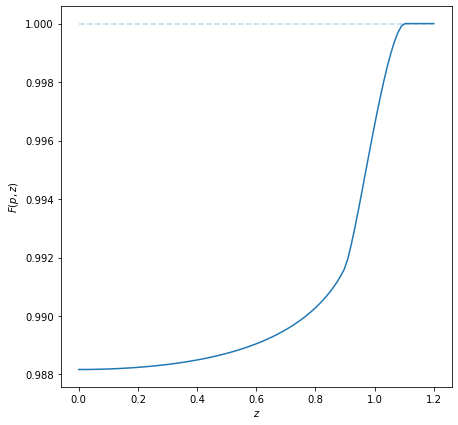

In [1]:
# Quadratic Limb Darkening Model

from scipy.misc import derivative
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

def L(r, P, Z):
  '''
  Obstruction function
  '''
  p = P/r
  z = Z/r
  if z>1+p:
    return 0.
  elif (abs(1-p)<z and z<=1+p):
    k0 = np.arccos((p**2 + z**2 -1)/(2*p*z))
    k1 = np.arccos((1-p**2 + z**2)/(2*z))
    L0 = k0*p**2
    L2 = np.sqrt((4*z**2- (1+z**2-p**2)**2)/4) 
    return (L0 + k1 - L2)*r**2/np.pi
  elif (z<=1-p):
    return p**2*r**2
  elif z<= p-1: # Check this option!!
    return 1.*r**2


def I_function(r):
  '''
  Quadratic limb-darkening function
  '''
  mu = np.sqrt(1-r**2) 
  return 1. - gamma1*(1-mu) - gamma2*(1-mu)**2


def integrand_1(r, p, z):
  '''
  Integrand in the numerator
  '''
  T1 = derivative(L, r, dx=1e-6, args=(p,z))
  T2 = I_function(r)
  return T1*T2


def integrand_2(r):
  '''
  Integrand in the denominator
  '''
  return I_function(r)*2*r

# Parameters for the model
gamma1 = 0.296 
gamma2 = 0.34
p=0.1

# Discretization grid
N = 100
z_range = np.linspace(0.,1.2,N)
F = np.zeros(N)

# Main Loop to calculate the Flux
for i in range(N):
  Integral_1 = integrate.quad(integrand_1, 0.0001, 1., args=(p,z_range[i]))[0]
  Integral_2 = integrate.quad(integrand_2, 0.0001, 1.)[0]
  F[i] = 1. - Integral_1/Integral_2

# Plot the Flux as function of z
plt.figure(figsize=(7,7))
plt.plot(z_range, F)
plt.hlines(1., 0., 1.2,linestyle='dashed', alpha=0.3)
plt.xlabel(r'$z$')
plt.ylabel(r'$F(p,z)$')
plt.show()

## Orbital model

### Circular orbit

For a circular orbit we have that the radial velocity of the planet around the star behaves as

\begin{equation}
    V_R(t) = K \cdot sin\left(\frac{2 \pi}{P}t+t_0\right) + V_{R0} 
\end{equation}

where $t$ is the time, $K$ is the absolute of the maximum radial velo city, $P$ is the period of the orbit, $t_0$
is the phase and $V_{R0}$ is the radial velo city of the system's center of mass.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def radial_velocity(K, P, t, t_0 = 0, V_R0 = 0):
    """
    By default t_0 = 0 and V_R0 = 0
    """
    return K*np.sin((2*np.pi/P)*t+t_0) + V_R0



---
## References


1. [astro-ph:0210099.pdf](https://arxiv.org/pdf/astro-ph/0210099.pdf).

2. [Modelling Exoplanets by D. Compton, D. Juncher and N. Vinyoles](https://phys.au.dk/fileadmin/Project_updated_gr.1.pdf)